In [1]:
import math  
import numpy as np 
import matplotlib.pyplot as plt 
import copy
import plotDecBoundaries as py

In [2]:
def training(feature_set, label_set): 
    len_set = len(feature_set)
    augmented = np.ones((len_set,1))
    for i in range(len_set):
        if(label_set[i] != 1):
            feature_set[i,0] = -feature_set[i,0]      #reflected data points
            feature_set[i,1] = -feature_set[i,1]
            feature_set[i,2] = -1           
        else:
            feature_set[i,2] = 1
            
    #weight_ini = np.array([0.1, 0.1, 0.1])
    
   # epoch = 0
    weight = np.zeros((len_set + 1, 3))
    cost_fun = np.zeros((len_set, 1))
    res_weight = np.zeros(3)
    
    for i in range(1000):           
        if i == 0:
            weight[0,:] = np.array([0.1, 0.1, 0.1])
        else:
            weight[0,:] = weight[len_set, :]        
        ###cost function
        for j in range(len_set):
            cost_fun[j] = np.dot(weight[j,:], feature_set[j,:])
            if cost_fun[j] <= 0:
                weight[j+1,:] = weight[j,:] + feature_set[j,:]
            else:
                weight[j+1,:] = weight[j,:]
        
        if(i == 999):              ###the last epoch
            cost = np.argmin(cost_fun)
            res_weight = weight[cost, :]
        else:
            res_weight = weight[len_set, :]   

        if(np.array_equal(weight[0, :], weight[len_set, :])):   
            break
            
    return res_weight

In [3]:
#def testing(input_data, weight):
def error_test(feature_set, weight, label_set): 
    len_set = len(feature_set)
    cost_fun = np.zeros((len_set, 1))
    feature_set[:,2] = 1
    
    
    #res_labels = np.zeros((len_set, 1))
    error = 0            
    for i in range(len_set):
        cost_fun[i] = np.dot(weight, feature_set[i,:])          #don't know 
        if cost_fun[i] <= 0:
            error += 1 
    
    return error

100
[-63.25075  63.4449   31.1    ]
error of 'synthetic1_train.csv' is 0.01
error of 'synthetic1_test.csv' is 0.0


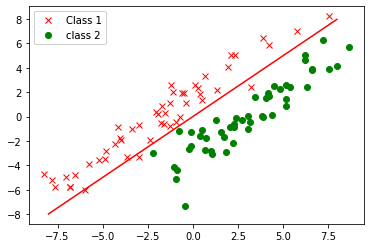

In [4]:
train_set1 = np.genfromtxt("synthetic1_train.csv", delimiter = ",")
test_set1  = np.genfromtxt("synthetic1_test.csv",  delimiter = ",")
size1 = len(train_set1[:,0])
print(size1)

train_set11 = copy.deepcopy(train_set1)
np.random.permutation(train_set11)
fea_set1 = np.array(train_set11[:, [0,1]])
label_set1 = np.array(train_set11[:,-1])

weight1 = training(train_set11, label_set1)
#weight11 = weight1/np.max(np.abs(weight1))
print(weight1)
error1 = error_test(train_set11, weight1, label_set1)
print("error of 'synthetic1_train.csv' is " + str(error1/size1))

test_set11 = copy.deepcopy(test_set1)
np.random.permutation(test_set11)
#fea_set12 = np.array(test_set11[:, [0,1]])
label_set2 = np.array(test_set11[:,-1])

weight2 = training(test_set11, label_set2)
#print(weight2)
error2 = error_test(test_set11, weight2, label_set2)
#print(error2)
print("error of 'synthetic1_test.csv' is " + str(error2/size1))
py.plotDecBoundaries(fea_set1, label_set1, weight1)

[-63.25075  63.4449   31.1    ]
error of 'synthetic2_train.csv' is 0.01
error of 'synthetic2_test.csv' is 0.05


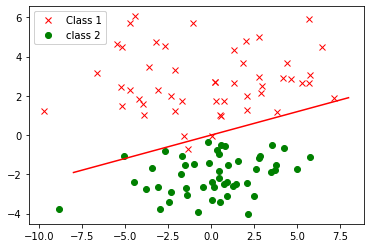

In [5]:
train_set2 = np.genfromtxt("synthetic2_train.csv", delimiter = ",")
test_set2  = np.genfromtxt("synthetic2_test.csv",  delimiter = ",")
size2 = len(train_set2[:,0])
#train_set
train_set21 = copy.deepcopy(train_set2)
np.random.permutation(train_set21)
fea_set2 = np.array(train_set21[:, [0,1]])
label_set3 = np.array(train_set21[:,-1])

weight3 = training(train_set21, label_set3)
#weight11 = weight1/np.max(np.abs(weight1))
print(weight1)
error3 = error_test(train_set21, weight3, label_set3)
print("error of 'synthetic2_train.csv' is " + str(error3/size2))

#test_set
test_set22 = copy.deepcopy(test_set2)
np.random.permutation(test_set22)
fea_set22 = np.array(test_set22[:, [0,1]])
label_set4 = np.array(test_set22[:,-1])

fea_set23 = np.array(test_set22[:, [0,1]])
weight4 = training(test_set22, label_set4)
#print(weight2)
error4 = error_test(test_set22, weight4, label_set4)
print("error of 'synthetic2_test.csv' is " + str(error4/size2))
py.plotDecBoundaries(fea_set2, label_set3, weight3)


In [6]:
feature_train = np.genfromtxt("feature_train.csv", delimiter = ",")
label_train = np.genfromtxt("label_train.csv", delimiter = ",")
feature_test  = np.genfromtxt("feature_test.csv",  delimiter = ",")
label_test = np.genfromtxt("label_test.csv", delimiter = ",")
#print(np.shape(train_set2))
size3 = len(feature_train[0,:])
feature_train1 = copy.deepcopy(feature_train)
np.random.permutation(feature_train1)
#combine feature_train and label_train
feature_train11 = np.column_stack((feature_train1,label_train))
weight5 = training(feature_train11, label_train)
#weight11 = weight1/np.max(np.abs(weight1))
print("error of 'feature_train.csv' is " + str(error5/size3))
error5 = error_test(feature_train11, weight5, label_train)
#print(error5)

feature_test1 = copy.deepcopy(feature_test)
np.random.permutation(feature_test1)
#combine feature_train and label_train
feature_test11 = np.column_stack((feature_test1,label_test))
#print(np.shape(feature_test11))
weight6 = training(feature_test11, label_test)
#weight11 = weight1/np.max(np.abs(weight1))
#print(weight6)
error6 = error_test(feature_test11, weight6, label_test)
print("error of 'feature_test.csv' is " + str(error6/size2))
print()
py.plotDecBoundaries(feature_train1, label_train, weight5)

NameError: name 'error5' is not defined